In [1]:
#importing Libraries
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
#models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [3]:
#Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import plot_roc_curve

In [4]:
from warnings import filterwarnings
filterwarnings("ignore")

In [5]:
data = pd.read_csv("C:\DataSets-master\DataSets-master\diabetes.csv")

In [6]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [7]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

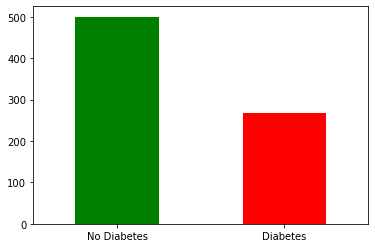

In [8]:
data["Outcome"].value_counts().plot(kind="bar",color=["green","red"])
plt.xticks(np.arange(2), ('No Diabetes', 'Diabetes'),rotation=0);

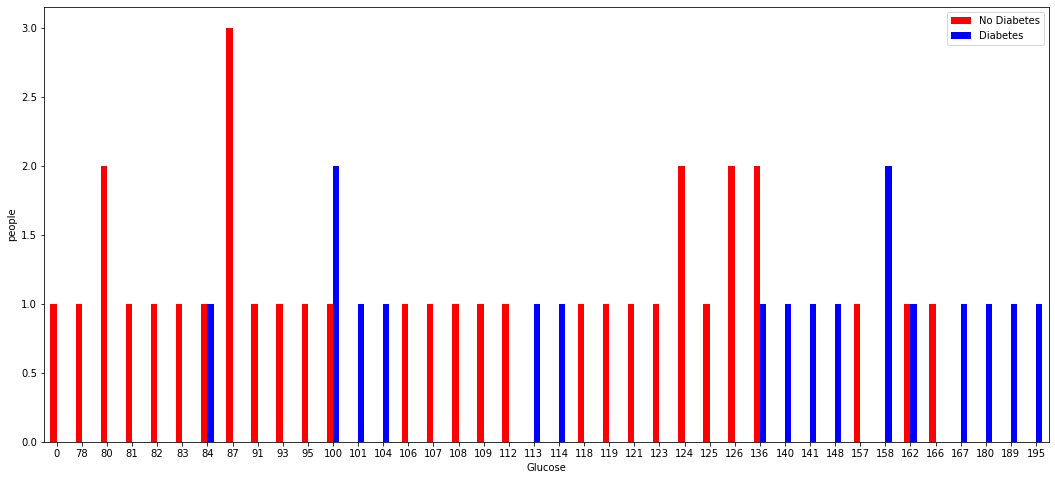

In [9]:
# Comparing Glucose with the Outcome
pd.crosstab(data.Glucose[::15],data.Outcome).plot(kind="bar",figsize=(18,8),color=["red","blue"])
plt.ylabel("people");
plt.xticks(rotation=0);
plt.legend(['No Diabetes', 'Diabetes']);

In [10]:
#random data shuffelin
data.sample(frac=1)

#Spliting the data
X = data.drop("Outcome",axis=1)
y = data["Outcome"]
X_train,X_test,y_train,y_test =  train_test_split(X,
                                              y,
                                              test_size=0.2)

In [11]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=0)
log_reg.fit(X_train,y_train);
## Evaluating the model
log_reg = log_reg.score(X_test,y_test)

In [12]:
#KNN
knn = KNeighborsClassifier()
knn.fit(X_train,y_train);
## Evaluating the model
knn = knn.score(X_test,y_test)

In [13]:
model_compare = pd.DataFrame({"Logistic Regression":log_reg,
                            "KNN":knn,                            
                            },index=["accuracy"])

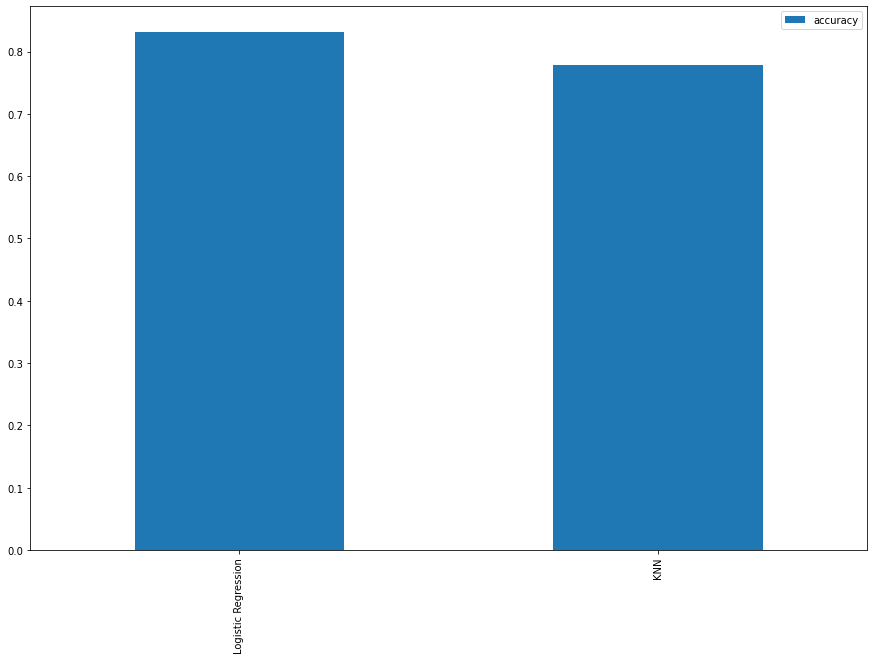

In [14]:
model_compare.T.plot.bar(figsize=(15,10));

In [15]:
log_reg_grid = {'C': np.logspace(-4,4,30),
               "solver":["liblinear"]}

#setup  the gird cv
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

#fit grid search cv
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [16]:
gs_log_reg.score(X_test,y_test)

0.8376623376623377

In [17]:
import pickle

# Save trained model to file
pickle.dump(gs_log_reg, open("Diabetespre.pkl", "wb"))

In [18]:
loaded_model = pickle.load(open("Diabetespre.pkl", "rb"))
loaded_model.predict(X_test)
loaded_model.score(X_test,y_test)

0.8376623376623377

In [19]:
Pregnancies = input()
Glucose = input()
BloodPressure = input()
SkinThickness = input()
Insulin = input()
BMI = input()
DiabetesPedigreeFunction = input()
Age = input()

75
45
45
45
45
45
45
45


In [20]:
row_df = pd.DataFrame([pd.Series([Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI ,DiabetesPedigreeFunction ,Age])])

In [21]:
prob = loaded_model.predict_proba(row_df)[0][1]
print(f"The probability of you having Diabetes is {prob}")

The probability of you having Diabetes is 1.0


In [22]:
loaded_model.predict(row_df)[0]

1